### IMPORTING IMPORTANT LIBRARIES

This is the Date a Scientist Capstone project on Codecademy.
This project went through a data exploration process by first
exploring the individual variables. 
Preprocessing step was also implemented to remove null values from the dataset.

The matplotblib and seaborn library were utilized in performing visulization on the dataset.

A predictive model was built using the Logistic regression and K-Nearest classifier to predict
whether people wants children or not. At the end of the this experiment, the logistic regression 
model performed better with an accuracy of 79%.

The model was balso to classifier or predict the zodiac symbol of the indidual. Three machine learning
algorithms were implemented, which are the Decision tree classifier, Naive Bayes Classifier and the
K-Nearest Neighbor Classifier. At the end of the experiment, it was observed that, all the three models
performed poorly on classifying the individual zodiac signs. Non of the models had an accuracy to be up 
to 10%.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv('profiles.csv')

In [5]:
len(df)

59946

In [6]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


The given data has 31 columns and 59946

### Explore the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

The columns in the dataset include: 
    
CATEGORICAL VARIABLES

- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations
    
NUMERICAL VARIABLES

- **age:** continuous variable of age of user
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

The dataframe contains only three numerical columns 
which are the age, height, income

In [8]:
df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [9]:
df.isnull().sum().sum()

273202

There 273,202 null values in the dataset in total

### EXPLORING NULL VALUES

In [212]:
null_values = list(df.isnull().sum())
columns = list(df.columns)

for null in list(zip(columns, null_values)):
    print(f"The {null[0]} column has {null[1]} null values")

The age column has 0 null values
The body_type column has 5296 null values
The diet column has 24395 null values
The drinks column has 2985 null values
The drugs column has 14080 null values
The education column has 6628 null values
The essay0 column has 5488 null values
The essay1 column has 7572 null values
The essay2 column has 9638 null values
The essay3 column has 11476 null values
The essay4 column has 10537 null values
The essay5 column has 10850 null values
The essay6 column has 13771 null values
The essay7 column has 12451 null values
The essay8 column has 19225 null values
The essay9 column has 12603 null values
The ethnicity column has 5680 null values
The height column has 3 null values
The income column has 0 null values
The job column has 8198 null values
The last_online column has 0 null values
The location column has 0 null values
The offspring column has 35561 null values
The orientation column has 0 null values
The pets column has 19921 null values
The religion column

###### GRAPH OF ALL NULL VALUES IN THE DATASET 

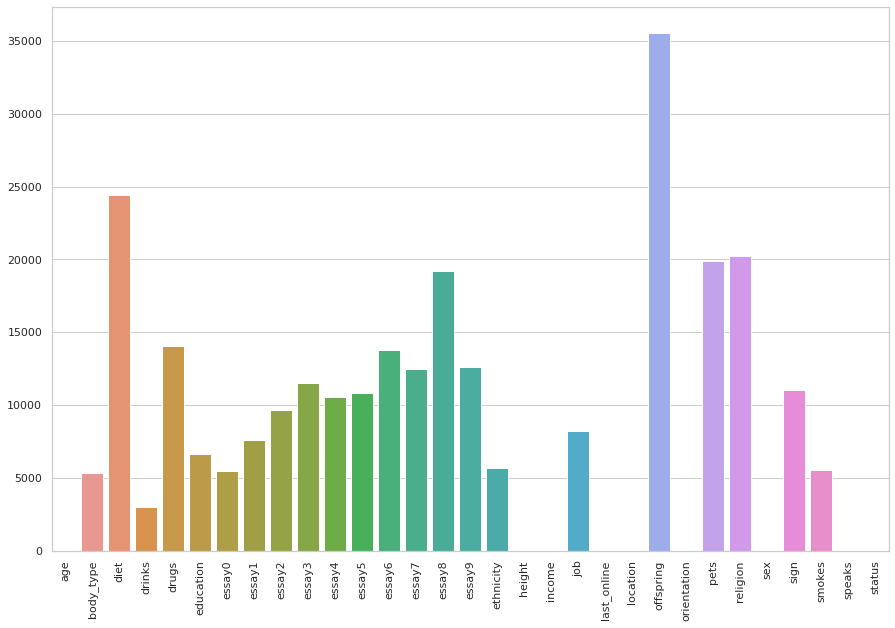

In [213]:
fig = plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x=columns, y=null_values)
plt.xticks(rotation=90)
plt.show()

It can be seen that the offspring column had a lot of null values
My guess is because a lot of people without children decided not fill that part
so we assume the null values can replaced with 0

The next column with lots of null values is the diet column
and this can be attributed to people who do not know their dietary information

The null values for pet and religion can be attributed to people who do not have a pet
 and religion respectively.
 
since there no null values for columns like age, income, height and location, we can assume
that there are no rows with all null values in the dataset

### SINGLE VARIABLE EXPLORATION

#### EXPLORATION OF CATEGORICAL VARIABLES

Since the work is based on the classification of the sign
we first have to check the unique signs that are available in the dataset

In [214]:
# Print the unique values in the sign column
df['sign'].nunique()

48

In [215]:
df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [10]:
def get_sign(column):
    lookUp = ['gemini', 'aquarius', 'cancer', 'leo', 'sagittarius',
              'taurus', 'scorpio', 'pisces', 'libra', 'virgo',
             'capricorn', 'aries']
    for sign in column.str.split():
        if sign in lookUp:
            return sign

In [11]:
df['improved_sign'] = df.sign.str.split().str.get(0)

In [12]:
df['improved_sign'].unique()

array(['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo',
       'sagittarius', 'leo', nan, 'aries', 'libra', 'scorpio',
       'capricorn'], dtype=object)

In [13]:
df['improved_sign'].nunique()

12

#### age

The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

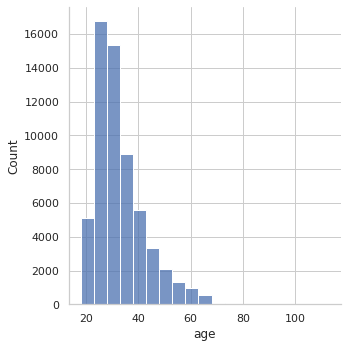

In [220]:
sns.displot(data=df, x="age", kind="hist", binwidth = 5);

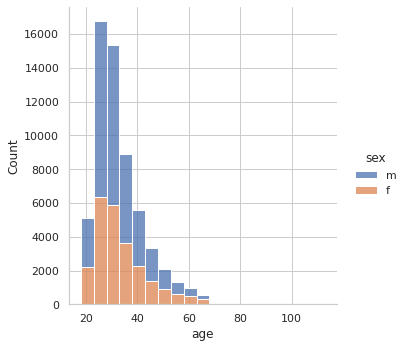

In [221]:
sns.displot(data=df, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

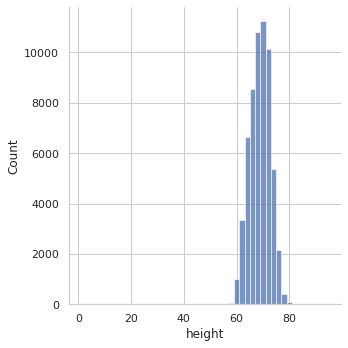

In [222]:
sns.displot(data=df, x="height", kind="hist", binwidth = 2);

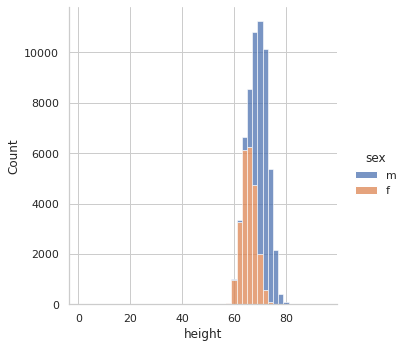

In [223]:
sns.displot(data=df, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

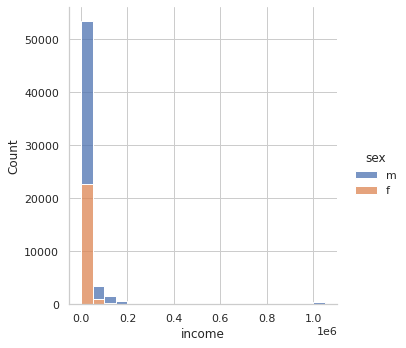

In [224]:
sns.displot(data=df, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")

<AxesSubplot:xlabel='count', ylabel='sex'>

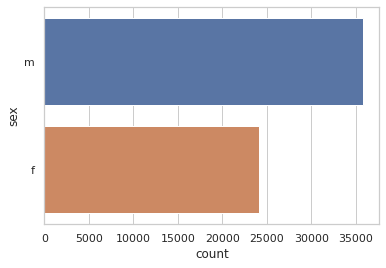

In [225]:
sns.countplot(data=df, y="sex")

<AxesSubplot:xlabel='count', ylabel='body_type'>

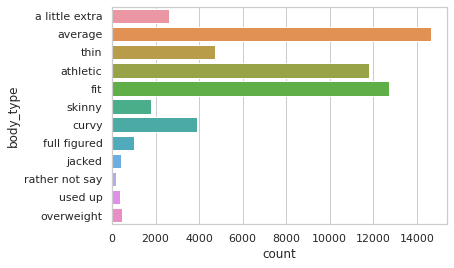

In [226]:
sns.countplot(data=df, y="body_type")

<AxesSubplot:xlabel='count', ylabel='body_type'>

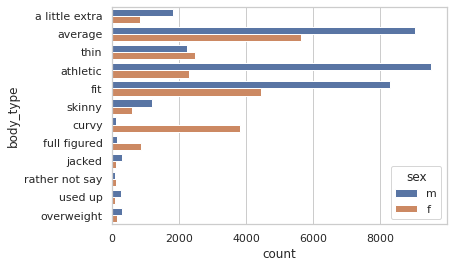

In [227]:
sns.countplot(data=df, y="body_type", hue = "sex")

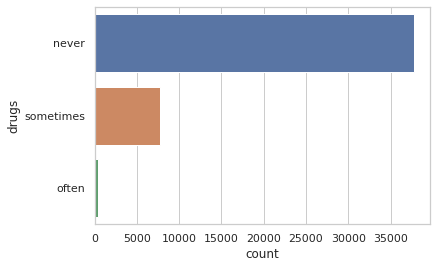

In [228]:
sns.countplot(data=df, y="drugs");

<AxesSubplot:xlabel='count', ylabel='orientation'>

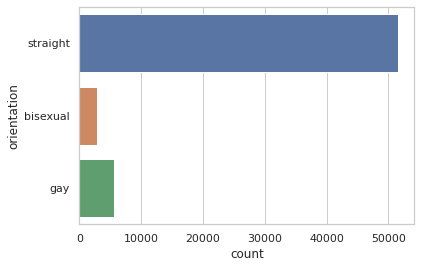

In [229]:
sns.countplot(data=df, y="orientation")

<AxesSubplot:xlabel='count', ylabel='orientation'>

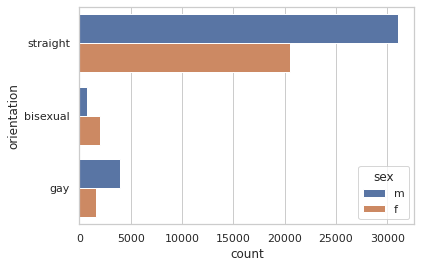

In [230]:
sns.countplot(data=df, y="orientation", hue = "sex")

  sex  count
0   f  24117
1   m  35829


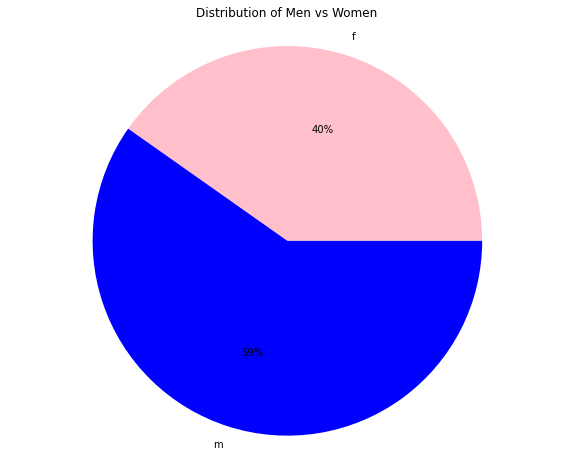

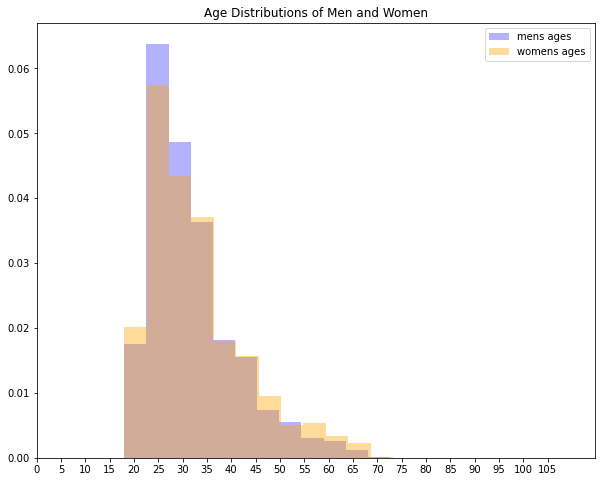

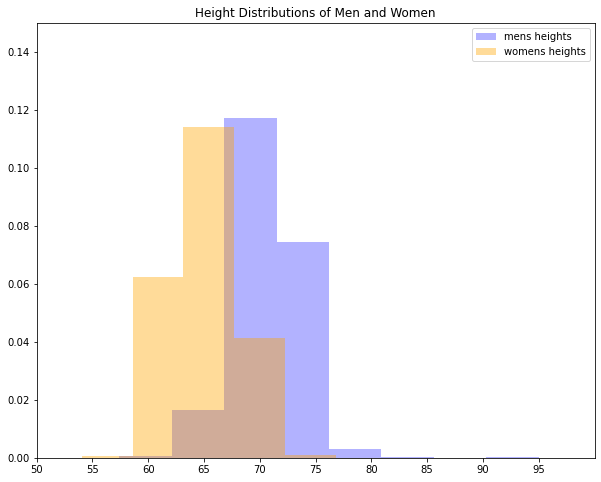

In [14]:
#Proportion of Men and Women

sex_df = df.groupby('sex')['age'].count().reset_index()
sex_df.rename(columns = {'age':'count'}, inplace = True)
print(sex_df)

plt.figure(figsize = (10,8))
ax1 = plt.subplot(1,1,1)
plt.pie(sex_df['count'], labels = sex_df['sex'], colors = ['pink', 'blue'], autopct = '%d%%')
plt.axis('equal')
plt.title('Distribution of Men vs Women')
plt.show()

#Age distributions
age_men = df[df['sex'] == 'm']['age']
age_women = df[df['sex'] == 'f']['age']

plt.close('all')
plt.figure(figsize = (10,8))
ax2 = plt.subplot(1,1,1)
plt.hist(age_men, alpha = 0.3, color = 'blue', density = True, bins = 20)
plt.hist(age_women, alpha = 0.4, color = 'orange', density = True, bins = 20)
plt.legend(['mens ages', 'womens ages'])
plt.title('Age Distributions of Men and Women')
ax2.set_xticks(range(0,110,5))
plt.show()

#Height distributions
height_men = df[df['sex'] == 'm']['height']
height_women = df[df['sex'] == 'f']['height']

plt.close('all')
plt.figure(figsize = (10,8))
ax3 = plt.subplot(1,1,1)
plt.hist(height_men, alpha = 0.3, color = 'blue', density = True, bins = 20)
plt.hist(height_women, alpha = 0.4, color = 'orange', density = True, bins = 20)
plt.axis([50,100, 0, 0.15])
plt.legend(['mens heights', 'womens heights'])
plt.title('Height Distributions of Men and Women')
ax3.set_xticks(range(50,100,5))
plt.show()

  sex orientation  counts
0   f    bisexual    1996
1   f         gay    1588
2   f    straight   20533
3   m    bisexual     771
4   m         gay    3985
5   m    straight   31073


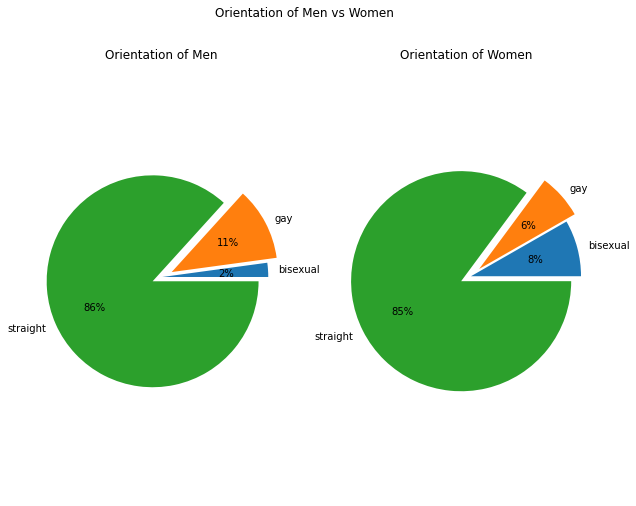

In [47]:
orientation = df.groupby(['sex', 'orientation'])['age'].count().reset_index()
orientation.rename(columns = {'age' : 'counts'}, inplace = True)
print(orientation)

explode = [0,0.1,0.1]

plt.close('all')
plt.figure(figsize = (10,8))
ax4 = plt.subplot(1,2,1)
plt.pie(orientation[orientation['sex'] == 'm']['counts'], labels = orientation[orientation['sex'] == 'm']['orientation'], autopct = '%d%%', explode = explode)
plt.axis('equal')
ax4.set_title('Orientation of Men')
ax5 = plt.subplot(1,2,2)
plt.pie(orientation[orientation['sex'] == 'f']['counts'], labels = orientation[orientation['sex'] == 'f']['orientation'], autopct = '%d%%', explode = explode)
plt.axis('equal')
ax5.set_title('Orientation of Women')
plt.suptitle('Orientation of Men vs Women')
plt.show()

### CHECKING IF SOMEONE WANTS A CHILD OR NOT

In [9]:
print(df['offspring'].unique())

["doesn't have kids, but might want them" nan "doesn't want kids"
 "doesn't have kids, but wants them" "doesn't have kids" 'wants kids'
 'has a kid' 'has kids' "doesn't have kids, and doesn't want any"
 "has kids, but doesn't want more" "has a kid, but doesn't want more"
 'has a kid, and wants more' 'has kids, and might want more'
 'might want kids' 'has a kid, and might want more'
 'has kids, and wants more']


We're not going to consider any qualifiers other than "wants" or "doesn't want" for these predictions. Answers which only indicate that someone "has" kids and not whether or not they "want" them will be excluded. Additionally, people who are currently uncertain will also be excluded from the test. We're primarily interested in creating a subset of people who know that they either want or don't want children.

For this reason, we'll begin by creating a list of the values we want based on the above list of unique values.

We also want to decide what features we'll use to make these predictions. In this case we'll go with:

Education,
Job,
Whether the person drinks or not,
Whether the person smokes or not,
Whether the person uses drugs or not,
Orientation,
Religion,
Age,
Whether they want or don't want children

In [11]:
df['religion_cleaned'] = df['religion'].dropna().apply(lambda x: x.split()[0])
df['location_cleaned'] = df['location'].dropna().apply(lambda x: x.split(", ")[1])

In [12]:
val_to_keep = ["doesn't want kids", "doesn't have kids, but wants them", \
              "wants kids", "doesn't have kids and doesn't want any", \
              "has kids, but doesn't want more", "has a kid, but doesn't want more", \
              "has a kid, and wants more", "has kids, and wants more"]
children_features = ['offspring', 'education', 'job', 'drinks', 'smokes', 'drugs', 'orientation', 'religion_cleaned', 'age', 'wants_children']

children_df = df[children_features[:-1]][df['offspring'].isin(val_to_keep)].dropna()
children_df['wants_children'] = children_df['offspring'].apply(lambda x: 0 if ("doesn't want" in x) \
                                                                else (1 if "want" in x else None))
age_min = children_df['age'].min()
age_max = children_df['age'].max()
children_df['age'] = children_df['age'].apply(lambda x: (x-age_min) / (age_max-age_min))
children_df['wants_children'] = children_df['wants_children'].astype(int)
children_df = children_df.drop(columns=['offspring'])
print(len(children_df))
children_df.head(5)

4354


,education,job,drinks,smokes,drugs,orientation,religion_cleaned,age,wants_children
7,graduated from college/university,artistic / musical / writer,socially,no,never,straight,christianity,0.254902,1
14,working on college/university,other,socially,no,never,straight,catholicism,0.215686,1
31,graduated from college/university,science / tech / engineering,socially,no,never,straight,atheism,0.176471,1
36,graduated from college/university,science / tech / engineering,socially,when drinking,never,straight,buddhism,0.274510,1
94,graduated from college/university,artistic / musical / writer,socially,no,sometimes,straight,agnosticism,0.215686,0


In [13]:
# This cell creates dummmy features that the classifier can easily interpret
for feature in children_features[1:-2]:
    children_df = pd.get_dummies(children_df, columns=[feature], prefix=[feature])
children_df.head()

,age,wants_children,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,...,orientation_straight,religion_cleaned_agnosticism,religion_cleaned_atheism,religion_cleaned_buddhism,religion_cleaned_catholicism,religion_cleaned_christianity,religion_cleaned_hinduism,religion_cleaned_islam,religion_cleaned_judaism,religion_cleaned_other
7,0.254902,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
14,0.215686,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
31,0.176471,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
36,0.274510,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
94,0.215686,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [14]:
data1 = children_df.iloc[:, 2:]
data2 = children_df.iloc[:, 0]
children_data = pd.concat([data1, data2], axis=1)
children_labels = children_df['wants_children'].values

children_train_data, children_test_data, children_train_labels, children_test_labels = train_test_split(children_data, \
                                                                                                       children_labels, \
                                                                                                       random_state=0)

### LOGISTIC REGRESSION MODEL

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(children_train_data, children_train_labels)
lr_predictions = lr_clf.predict(children_test_data)
print(classification_report(children_test_labels, lr_predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       582
           1       0.76      0.80      0.78       507

    accuracy                           0.79      1089
   macro avg       0.79      0.79      0.79      1089
weighted avg       0.79      0.79      0.79      1089



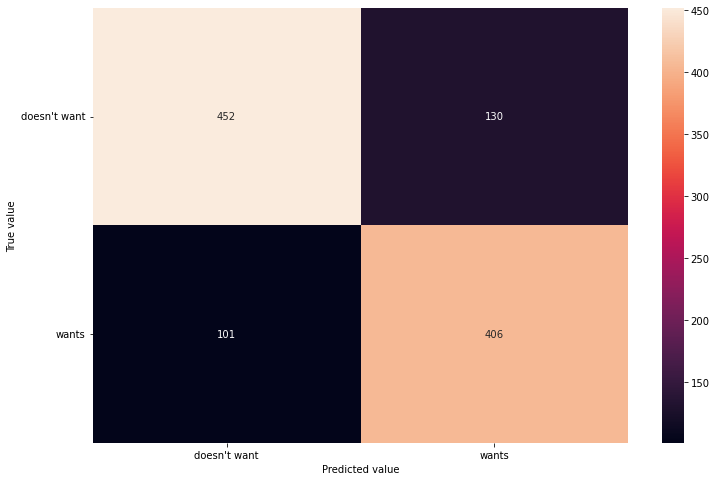

In [18]:
# CONFUSION MATRIX FOR THE LOGISTIC REGRESSION CLASSIFIER
from sklearn.metrics import confusion_matrix
children_cm = confusion_matrix(children_test_labels, lr_predictions)

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(children_cm, annot=True, ax = ax,fmt="d")
ax.set_xlabel("Predicted value")
ax.set_ylabel("True value")
ax.set_xticklabels(["doesn't want", "wants"])
ax.set_yticklabels(["doesn't want", "wants"], rotation=360)
plt.savefig('lr-cm.png')
plt.show()


The logistic regression model had an accuracy of 79%. A true positive of 452 was recorded
A false positive of 130 was recorded, 101 for true negative and 406 for false negative.

### K-NEAREST NEIGHBOR CLASSIFIER

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(children_train_data, children_train_labels)
knn_child_predictions = knn_clf.predict(children_test_data)
print(classification_report(children_test_labels, knn_child_predictions))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       582
           1       0.68      0.77      0.72       507

    accuracy                           0.72      1089
   macro avg       0.73      0.73      0.72      1089
weighted avg       0.73      0.72      0.72      1089



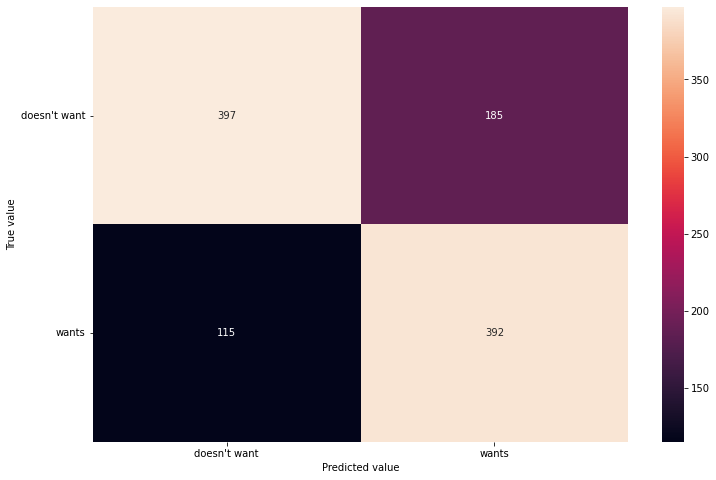

In [21]:
from sklearn.metrics import confusion_matrix
children_cm = confusion_matrix(children_test_labels, knn_child_predictions)

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(children_cm, annot=True, ax = ax,fmt="d")
ax.set_xlabel("Predicted value")
ax.set_ylabel("True value")
ax.set_xticklabels(["doesn't want", "wants"])
ax.set_yticklabels(["doesn't want", "wants"], rotation=360)
plt.savefig('knn-cm.png')
plt.show()

#### TRYING TO PREDICT USERS ZODIAC SIGNS FROM THE INFORMATION ON THEIR PROFILES

If we check back to our table containing a count of NaN values, we can see that sign has around 11,000 missing values. Using features that describe a user's habits and what they do for a living, we could potentially predict someone's zodiac sign in order to fill in the missing values. We'll want to do two things before we actually begin training an ML model on our data: select the classifiers we'll be using, and select a subet of data that we'll train those models on.

Finally, we're only interested in the sign itself, not whether or not the user in question is a fervent believer in astrology. We can see after cleaning the data that some rows include things like "but it doesn't matter" in conjunction with a user's sign. We'll be removing this. 

### adding some columns to the dataset

In [48]:
signs_features = ['sign', 'drinks', 'drugs', 'smokes', 'diet', 'body_type', 'job', 'pets']
signs_df = df[signs_features].dropna()
signs_df['sign'] = signs_df['sign'].apply(lambda str: str.split()[0])
print(len(signs_df))
signs_df.head()

15821


,sign,drinks,drugs,smokes,diet,body_type,job,pets
0,gemini,socially,never,sometimes,strictly anything,a little extra,transportation,likes dogs and likes cats
1,cancer,often,sometimes,no,mostly other,average,hospitality / travel,likes dogs and likes cats
7,sagittarius,socially,never,no,mostly anything,average,artistic / musical / writer,likes dogs and likes cats
9,cancer,not at all,never,no,mostly anything,athletic,student,likes dogs and likes cats
11,leo,socially,never,no,mostly anything,average,banking / financial / real estate,likes cats


### CREATING DUMMY VARIABLES

To achieve the aforementioned goal, we'll use get_dummies() to turn each column into several that contain binary values our model can learn from.

In [49]:
for feature in signs_features[1:]:
    signs_df = pd.get_dummies(signs_df, columns=[feature], prefix=[feature])
signs_df.head()

,sign,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,...,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats
0,gemini,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,cancer,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,sagittarius,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,cancer,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,leo,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
signs_df['sign'].value_counts()

virgo          1436
leo            1414
cancer         1389
gemini         1378
taurus         1341
libra          1325
scorpio        1323
aries          1280
sagittarius    1268
pisces         1268
aquarius       1231
capricorn      1168
Name: sign, dtype: int64

#### SPLITTING DATA INTO TRAINING AND TESTING SET

In [51]:
from sklearn.model_selection import train_test_split

data = signs_df.iloc[:, 1:]
labels = signs_df['sign'].values

signs_train_data, signs_test_data, signs_train_labels, signs_test_labels = train_test_split(data, labels, random_state=0)

### BUILDING OF MODELS

In [52]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#### Evaluating and Testing Our Models

We'll also use two different functions to evaluate our models. One will print a classification report that includes a model's precision, recall, and F1-score. The other will use a K-FOLD Cross Validation score, testing the model K times(default 5), and returning a score each time. We'll average those score to get an overall sense of that model's accuracy.

Our models will create predictions based on the test set, not the training set. These predictions are then what we'll use to evaluate a model's accuracy.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

### DECISION TREE CLASSIFIER

In [59]:
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(signs_train_data, signs_train_labels)
tree_predictions = treeClassifier.predict(signs_test_data)

### HEATMAP SHOWING THE PREDICTED ZODIAC AND THE ACTUAL SIGNS

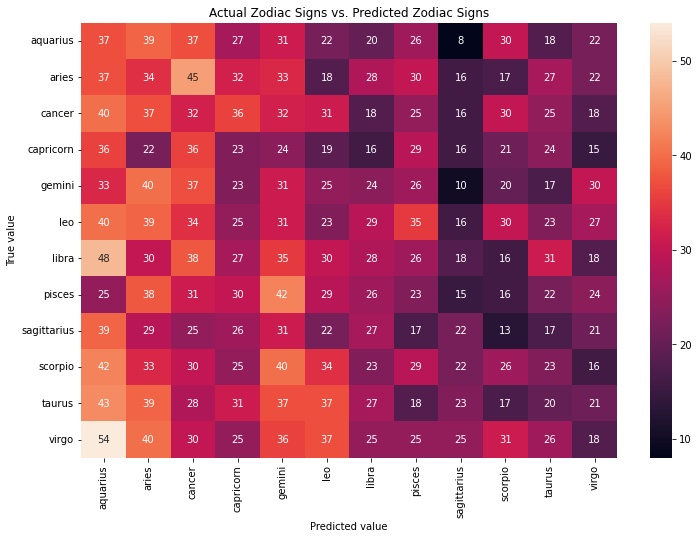

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(signs_test_labels, tree_predictions)

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d")
plt.title("Actual Zodiac Signs vs. Predicted Zodiac Signs")
ax.set_xlabel("Predicted value")
ax.set_ylabel("True value")
ax.set_xticklabels(treeClassifier.classes_, rotation=90)
ax.set_yticklabels(treeClassifier.classes_, rotation=360)
plt.show()

In [63]:
tree_score = cross_val_score(treeClassifier, signs_test_data, signs_test_labels).mean() * 100
print(classification_report(signs_test_labels, tree_predictions))
print("Accuracy: {:.2f}%".format(tree_score))
print("Tree depth: {0}".format(treeClassifier.get_depth()))

              precision    recall  f1-score   support

    aquarius       0.08      0.12      0.09       317
       aries       0.08      0.10      0.09       339
      cancer       0.08      0.09      0.09       340
   capricorn       0.07      0.08      0.08       281
      gemini       0.08      0.10      0.09       316
         leo       0.07      0.07      0.07       352
       libra       0.10      0.08      0.09       345
      pisces       0.07      0.07      0.07       321
 sagittarius       0.11      0.08      0.09       289
     scorpio       0.10      0.08      0.09       343
      taurus       0.07      0.06      0.07       341
       virgo       0.07      0.05      0.06       372

    accuracy                           0.08      3956
   macro avg       0.08      0.08      0.08      3956
weighted avg       0.08      0.08      0.08      3956

Accuracy: 9.05%
Tree depth: 60


### K-NEAREST NEIGHBORS CLASSIFIER

In [64]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(signs_train_data, signs_train_labels)
knn_predictions = knn_clf.predict(signs_test_data)
knn_score = cross_val_score(knn_clf, signs_test_data, signs_test_labels).mean() * 100
print(classification_report(signs_test_labels, knn_predictions))
print("Accuracy: {:.2f}%".format(knn_score))

              precision    recall  f1-score   support

    aquarius       0.07      0.19      0.10       317
       aries       0.09      0.16      0.12       339
      cancer       0.09      0.14      0.11       340
   capricorn       0.08      0.09      0.08       281
      gemini       0.09      0.10      0.10       316
         leo       0.09      0.07      0.08       352
       libra       0.11      0.06      0.07       345
      pisces       0.11      0.06      0.08       321
 sagittarius       0.08      0.06      0.07       289
     scorpio       0.10      0.05      0.07       343
      taurus       0.13      0.08      0.10       341
       virgo       0.11      0.05      0.07       372

    accuracy                           0.09      3956
   macro avg       0.10      0.09      0.09      3956
weighted avg       0.10      0.09      0.09      3956

Accuracy: 7.96%


In [65]:
accuracies = []
best_accuracy = 0
best_k = 0
for i in range(1,21):
    test_knn = KNeighborsClassifier(n_neighbors=i)
    test_knn.fit(signs_train_data, signs_train_labels)
    score = cross_val_score(test_knn, signs_test_data, signs_test_labels).mean() * 100
    accuracies.append(score)
    if score > best_accuracy:
        best_accuracy = score
        best_k = i

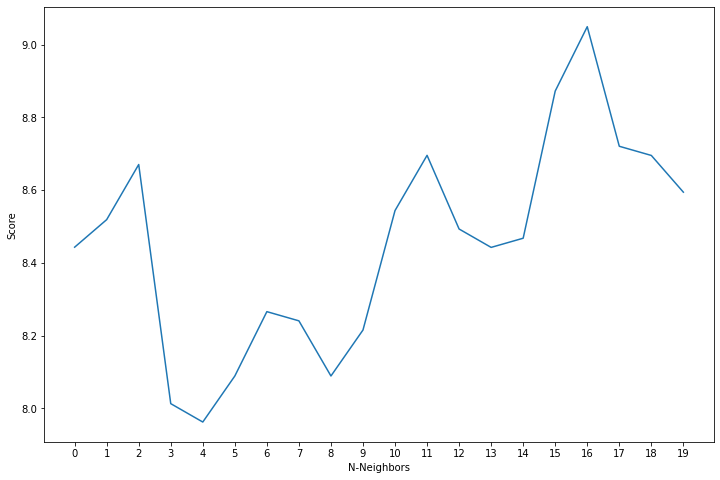

In [66]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel("N-Neighbors")
plt.ylabel("Score")
ax.set_xticks(range(len(accuracies)))
plt.show()

### NAIVE-BAYES CLASSIFIER

In [6]:
df.replace(r"<[^<]+?>", " ", regex=True, inplace=True)
df.replace(r"\n", " ", regex=True, inplace=True)
df.replace(r"&amp;", "&", regex=True, inplace=True)
df.replace(r"&rsquo;", "'", regex=True, inplace=True)
df.head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me: i would love to think that i was ...,currently working as an international agent fo...,making people laugh. ranting about a good sal...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


In [7]:
essays_list = ["essay" + str(i) for i in range(0,10)]
df['bio'] = df[essays_list].apply(lambda x: x + ' ').fillna(' ').sum(axis=1)
df['bio'].replace(r"\s+", " ", regex=True, inplace=True)
print(df['bio'][3])
print(df['sign'][2])
print(df['offspring'][3])

i work in a library and go to school. . . reading things written by old dead people playing synthesizers and organizing books according to the library of congress classification system socially awkward but i do my best bataille, celine, beckett. . . lynch, jarmusch, r.w. fassbender. . . twin peaks & fishing w/ john joy division, throbbing gristle, cabaret voltaire. . . vegetarian pho and coffee cats and german philosophy you feel so inclined. 
pisces but it doesn't matter
doesn't want kids


In [8]:
bio_df = df[['bio', 'sign']].dropna()
bio_df['sign'] = bio_df['sign'].apply(lambda str: str.split()[0])
print(len(bio_df))
bio_df.head()

48890


,bio,sign
0,about me: i would love to think that i was som...,gemini
1,i am a chef: this is what that means. 1. i am ...,cancer
2,"i'm not ashamed of much, but writing public te...",pisces
3,i work in a library and go to school. . . read...,pisces
4,hey how's it going? currently vague on the pro...,aquarius


In [73]:
nb_clf = Pipeline([
    ('counter', CountVectorizer(stop_words='english')),
    ('transformer', TfidfTransformer()),
    ('clf', MultinomialNB())
])

bio_data = bio_df['bio'].values
bio_labels = bio_df['sign'].values


bio_train_data, bio_test_data, bio_train_labels, bio_test_labels = train_test_split(bio_data, bio_labels)
nb_clf.fit(bio_train_data, bio_train_labels)
nb_predictions = nb_clf.predict(bio_test_data)
print("Accuracy: {:.2f}%".format(np.mean(nb_predictions == bio_test_labels) * 100))

Accuracy: 9.02%


### DISCUSSION OF RESULTS

#### DECISION TREE CLASSIFIER
the results of the predictions made by the decision tree don't seem to indicate that it's very accurate. At around 9% accuracy, it'll accurately predict a zodiac sign based on the given features roughly 1 out of 12 times, which is the probability of a person randomly picking a zodiac sign and getting it correct. That means that our decision tree model is, sadly, no better than a human at correctly predicting zodiac sign based on these features. Tweaking the max_depth of the tree achieves very little as far as accuracy goes. By default, it reaches a depth of 60.

#### K-NEAREST CLASSIFIER
the highest average score was around 7%, peaking at a K value of 16. It would be hard to justify looping through more values, as the amount of change seen is minimal and appears to once again drop after n_neighbors=16. Sadly, K-Nearest Neighbors will not help us assign zodiac signs in an accurate way, either.

#### NAIVE-BAYES CLASSIFIER
Much like the Decision Tree and K-Nearest Neighbors, it's not very accurate (once again hovering around 9%). It stands about the same chance at correctly predicting a zodiac sign as it would by picking it at random.